# Ford GoBike Dataset Analysis(Exploratory)
### by Oluwadara

## Introduction:
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips.

I will be using this notebook to clean and analyse the dataset and also answer questions with visualizations using the different python libraries. 







<h1 align="center">Preliminary Wrangling</h1>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#loading the dataset into the pandas Dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#quick overview of the data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#data structure
df.shape

(183412, 16)

It contains 183412 entries with 16 columns

In [5]:
#more details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
#get sum of null values in columns with null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are Null values in the (gender,birth year and stations) columns

In [7]:
#descriptive statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
#checking for duplicates
df.duplicated().sum()

0

There are no duplicate values in this dataset.

### Data Cleaning:

Since there are no duplicated values we can now move to drop columns with missing values

In [9]:
#remove missing values
df_clean = df.dropna()

In [10]:
#new info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


We now have 174952 entries with 16 columns

In [11]:
# change start_time and end_time to datetime format
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [13]:
#create new column(day, hours ) from start_time and end_time columns
df_clean['start_day_of_week']= df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hour']= df_clean['start_time'].dt.hour

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day_of_week          174952 non-null object
start_time_hour   

In [15]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day_of_week,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thu,23


In [16]:
#create new age column from member_birth_year
df_clean['age'] = 2022 - df_clean['member_birth_year']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day_of_week          174952 non-null object
start_time_hour   

In [18]:
# make age and memeber_birth_year columns int dtype
df_clean['age'] = df_clean['age'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day_of_week          174952 non-null object
start_time_hour     

In [20]:
#drop unnecessary columns
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_day_of_week', 'start_time_hour', 'age'],
      dtype='object')

In [21]:
df_clean.drop(columns=['start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude',
                    'end_station_id', 'end_station_latitude', 'end_station_longitude'], axis = 1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
duration_sec               174952 non-null int64
start_station_name         174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day_of_week          174952 non-null object
start_time_hour            174952 non-null int64
age                        174952 non-null int64
dtypes: int64(5), object(6)
memory usage: 16.0+ MB


In [23]:
# final view of the cleaned dataset
df_clean.head()

,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day_of_week,start_time_hour,age
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thu,17,38
2,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thu,12,50
3,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thu,17,33
4,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thu,23,48
5,1793,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,Thu,23,63


### What is the structure of your dataset?
After cleaning the dataset, the dataset now has 174952 entries with 11 columns. 

It now contains the following features(duration_sec, start_station_name, end_station_name, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, start_day_of_week, start_time_hour, age).   

During the cleaning I added some new features that would be needed for performing the analysis.I added(age, day of the week and hour). 


### What is/are the main feature(s) of interest in your dataset?
- Biking duration
- Gender
- Age 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The features that will help in my investigation are :
- Gender
- member_birthyear
- User type
- Time 



<h1 align="center">Univariate Exploration</h1>


I will start by looking at the distribution of the main variable of interest;
### Biking duration:
 


In [24]:
#Converting duration from secs to min
df_clean['duration_min'] = df_clean['duration_sec']/60

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               174952 non-null int64
start_station_name         174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day_of_week          174952 non-null object
start_time_hour            174952 non-null int64
age                        174952 non-null int64
duration_min               174952 non-null float64
dtypes: float64(1), int64(5), object(6)
memory usage: 17.4+ MB


In [26]:
df_clean.head()

,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day_of_week,start_time_hour,age,duration_min
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thu,17,38,869.750000
2,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thu,12,50,1030.900000
3,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thu,17,33,608.166667
4,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thu,23,48,26.416667
5,1793,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,Thu,23,63,29.883333


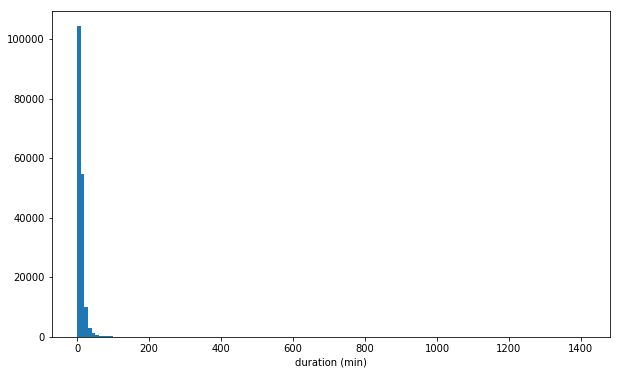

In [27]:
#starting with a standard plot
binsize = 10
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xlabel('duration (min)')
plt.show()

In [28]:
df_clean['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

##### - The plot showed that most that appears below 50, which is true but there are still some spread out. I should adjust the plot to show those too. 

In [29]:
# setting function for labels and default color
def labels(x, y, title):
    plt.title(title, fontsize = 14, weight = 'bold')
    plt.xlabel(x, fontsize = 10, weight = 'bold')
    plt.ylabel(y, fontsize = 10, weight = 'bold')
color = sb.color_palette()[0]

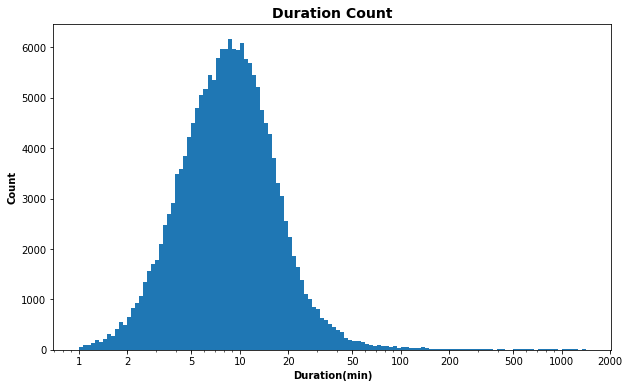

In [30]:
#there is a long tail in the distribution, so let's put it on a log scale 
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 6]);
plt.hist(data = df_clean, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
labels('Duration(min)', 'Count', 'Duration Count');

##### - Biking duration has a long tailed distribution having most riders below 60min and a few riders above that.  After plotting on a log-scale, the distribution now looks more normal with a peak of a little above 6000.

### Age:

In [31]:
print(df_clean['age'].describe())

print('A member with the age 144 seems odd')

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: age, dtype: float64
A member with the age 144 seems odd


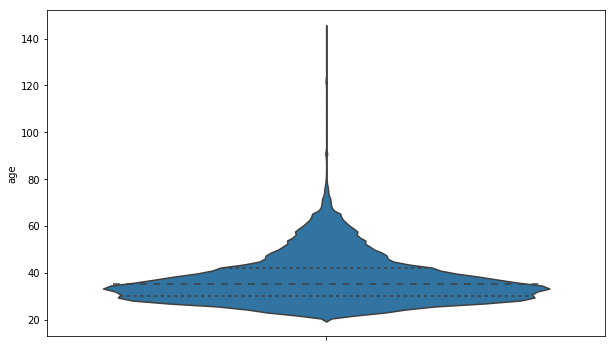

In [32]:
# plotting a violin plot
fig = plt.figure(figsize = (10, 6))
sb.violinplot(data = df_clean, y = 'age', inner='quartile');


#### This is not evenly distributed. There are most bikers between the age of 30-40, not having much bikers above age 40.

Since most bikers fall between the age of 25-40 and a few over the age 0f 40-60. we should focus on those age to have a more better distribution.

In [33]:
#  Only keep record with member_age below 60.
df_clean = df_clean[df_clean['age'] <= 60]

In [34]:
df_clean['age'].describe()

count    169171.000000
mean         36.185558
std           8.518091
min          21.000000
25%          30.000000
50%          35.000000
75%          41.000000
max          60.000000
Name: age, dtype: float64

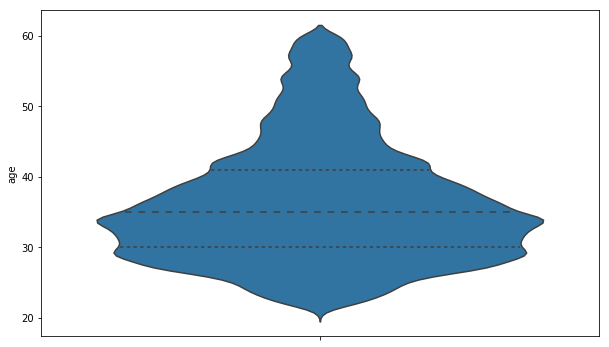

In [35]:
fig = plt.figure(figsize = (10, 6))
sb.violinplot(data = df_clean, y = 'age', inner='quartile');

### Gender:

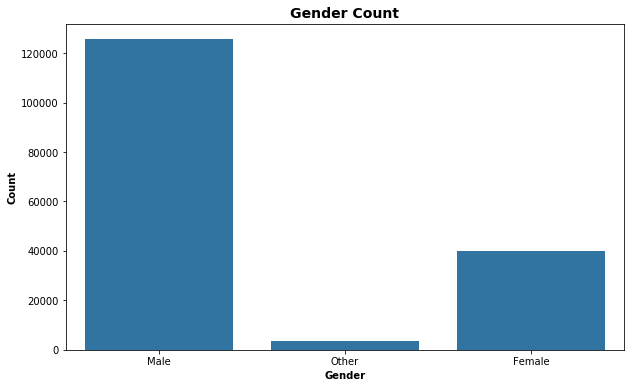

In [36]:
fig = plt.figure(figsize = (10, 6))

sb.countplot(data = df_clean, x = 'member_gender', color = color);
labels('Gender', 'Count', 'Gender Count');

#### There are more male bikers than the female bikers. With a count of over 120,000 which is about 3 times the female.

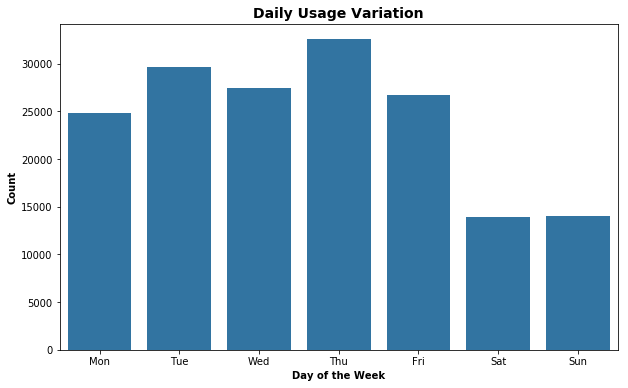

In [37]:
#weekly labels
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig = plt.figure(figsize = (10, 6))
sb.countplot(data = df_clean, x = 'start_day_of_week', color = color, order = weekday_labels);

labels('Day of the Week', 'Count', 'Daily Usage Variation');

#### Thursday has the most bikers while Sunday and Saturday seems to have the least bikers 

In [38]:
user_type = df_clean['user_type'].value_counts()

#### We have 2 user type(subscriber and customer). let check to see how the subscriber compares to the customer.

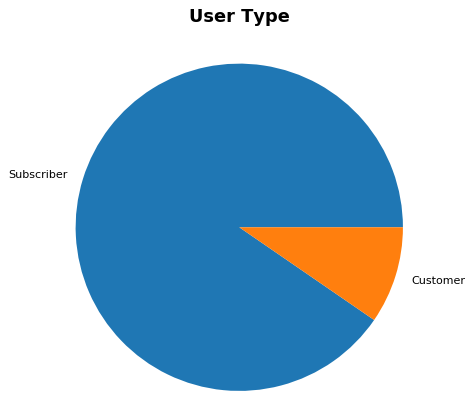

In [39]:
fig = plt.figure(figsize = (10, 6), dpi= 80, facecolor='w', edgecolor='k')



plt.pie(user_type, labels=user_type.index)
plt.axis('square')
plt.title('User Type', y=1.05, fontsize=16, fontweight='bold', color = 'black');

#### we can see we clearly that we have lot more of subscribers than the customers.

### Checking for most used ride station :


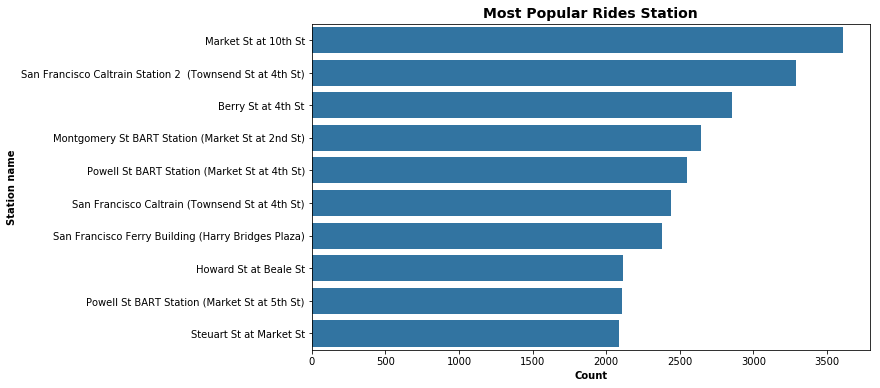

In [40]:
order = df_clean['start_station_name'].value_counts().index[:10]#top 10
plt.figure(figsize=[10,6])
sb.countplot(data = df_clean, y = 'start_station_name', color = color, order = order);
labels('Count', 'Station name', 'Most Popular Rides Station');

We can see that Market St at 10th St and San Francisco station 2(Townsend St at 4th St) are the two most popular start station

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Most of the ckeaning was normal and I was able to make some observation. I had to remove outliers for the age though in order to get a more intresting distribution. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I seperated the start time into start hour and start day
- I removed outliers from age

<h1 align="center">Bivariate Exploration</h1>

### Checking how trip duration(duration_min) varies with days of the week.

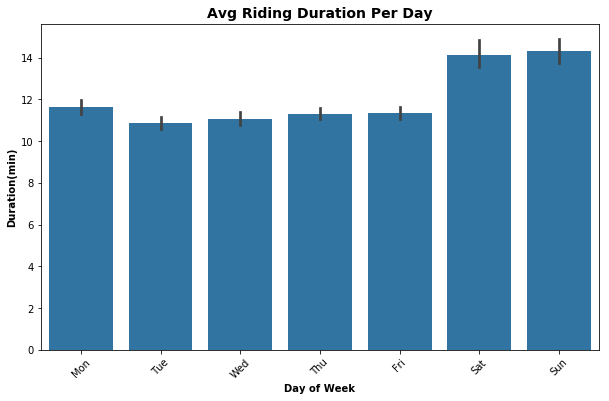

In [41]:


plt.figure(figsize=(10,6))
plt.xticks(rotation=45);


#plotting a bar plot

sb.barplot(data = df_clean, x='start_day_of_week', y='duration_min', color = color, order = weekday_labels);
labels('Day of Week', 'Duration(min)', 'Avg Riding Duration Per Day');

#### Observation:
- Average duration of about 11 to 12 minutes which is during weekdays
- Weekends seems to be higher probably due to people being free on weekends

### User_type vs start_day_of_the_week:

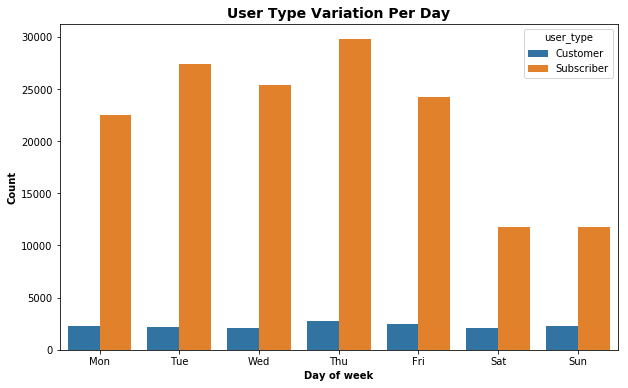

In [42]:
order = df_clean['start_day_of_week'].value_counts().index
fig=plt.figure(figsize=(10,6))



sb.countplot(data = df_clean, x = 'start_day_of_week', hue = 'user_type', order = weekday_labels);
labels('Day of week', 'Count', 'User Type Variation Per Day');

#### Observation:
- Most subscribers prefers cycling on  weekdays(means they are working class)
- It appears the customers dont really like to ride both on weekdays and weekends


### User_type vs start_time_hour

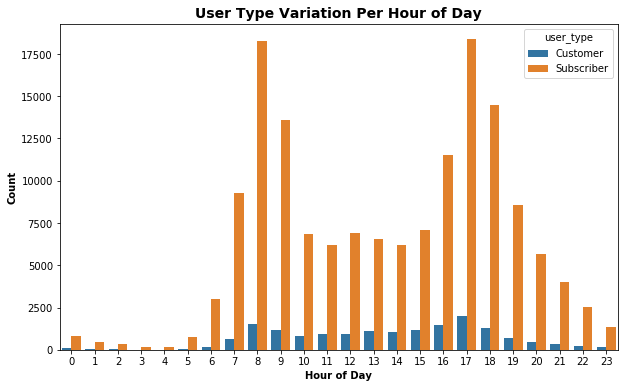

In [43]:
fig=plt.figure(figsize=[10, 6])


plt.title('User type variation with the Hour of the Day ');

sb.countplot(data=df_clean, x='start_time_hour', hue='user_type');
labels('Hour of Day', 'Count', 'User Type Variation Per Hour of Day');

#### Observation:
- Most of the subscribers ride around the 17 and 18 hour(4pm and 5pm respectively) which is the closing hours.
- They prefer to ride back home from work. 

### Duration vs user_type:

In [44]:
df_clean['duration_min'].describe()

count    169171.000000
mean         11.718715
std          27.731494
min           1.016667
25%           5.366667
50%           8.483333
75%          13.100000
max        1409.133333
Name: duration_min, dtype: float64

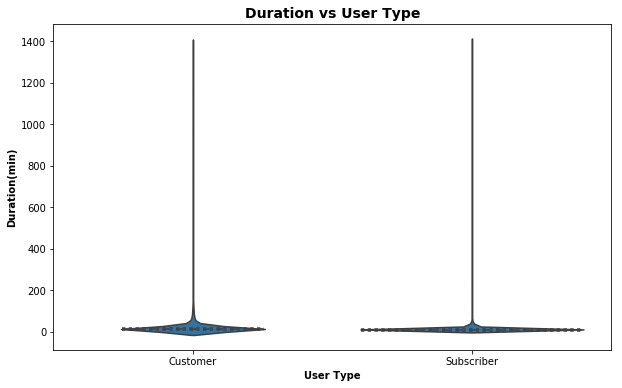

In [45]:
fig=plt.figure(figsize=(10,6))
sb.violinplot(data = df_clean, x = 'user_type', y = 'duration_min', color = color, inner='quartile');
labels('User Type', 'Duration(min)', 'Duration vs User Type');

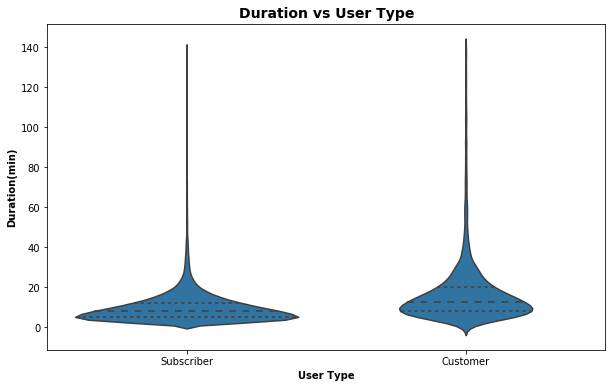

In [46]:
# removing outliers for a more viable plot...majority is between 0-150min
df_clean = df_clean[df_clean['duration_min'] <= 140]

#plotting without the outliers
fig=plt.figure(figsize=(10,6))
sb.violinplot(data = df_clean, x = 'user_type', y = 'duration_min', color = color, inner='quartile');
labels('User Type', 'Duration(min)', 'Duration vs User Type');

#### There are still some outliers, adjusting to 60mins


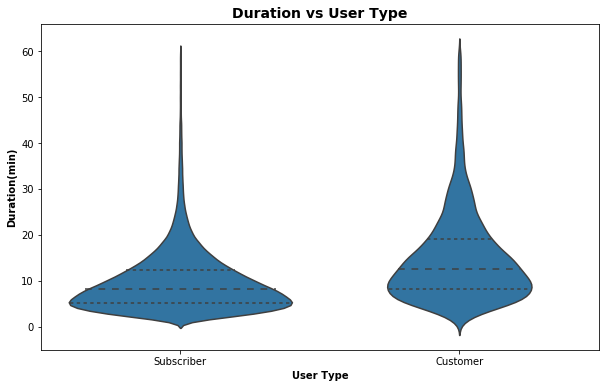

In [47]:
# removvng outliers ....
df_clean = df_clean[df_clean['duration_min'] <= 60]

#plotting without the outliers
fig=plt.figure(figsize=(10,6))
sb.violinplot(data = df_clean, x = 'user_type', y = 'duration_min', color = color, inner='quartile');
labels('User Type', 'Duration(min)', 'Duration vs User Type');

#### It looks better this way.

Observation:
- Majority of the subscribers rides for about (7-12) mins while the customers mostly rides between (10-20)mins.
- In general, customers have longer riding durations than the subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- We have more subscribers than customers.
- Subscribers rides more during weekdays compared to weekends.
- Male riders very much more than female riders.
- Most biking duration for both subscribers and customers falls between(8-10)mins.
- After checking the user_type to start_time and start_day, it appears that most of the subscriberss are working class.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- No

<h1 align="center">Multivariate Exploration</h1>



#### Comparing duration minutes during weekdays for Customers and Subscribers:

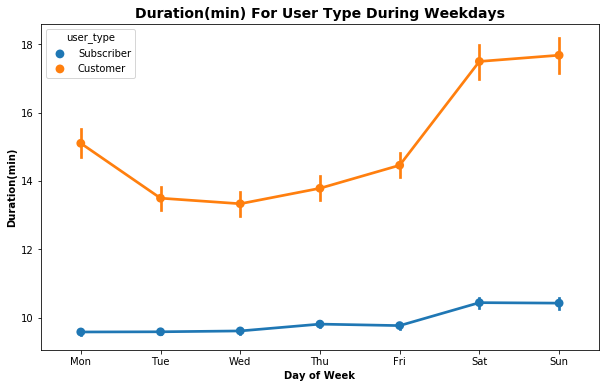

In [48]:
order = df_clean['start_day_of_week'].value_counts().index
fig=plt.figure(figsize=(10,6))

# plotting a pointplot
sb.pointplot(data=df_clean, x='start_day_of_week', y='duration_min', hue='user_type', order = weekday_labels);
labels('Day of Week', 'Duration(min)', 'Duration(min) For User Type During Weekdays');

#### Observation:
- Customers have longer rides duration especially on weekends.
- Subscribers have a consistent range during weekdays(10)mins with a little above range on weekends(11)mins.

#### Member_gender vs Trip Duration:

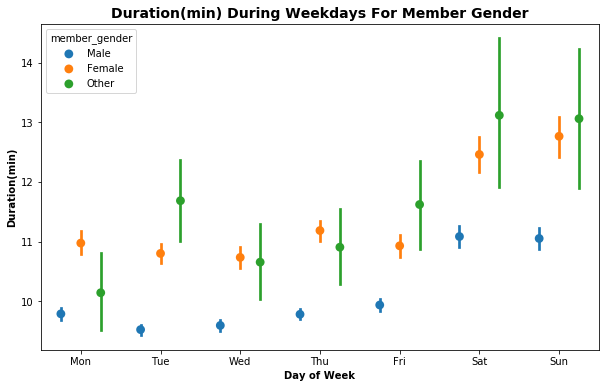

In [49]:
order = df_clean['start_day_of_week'].value_counts().index
fig=plt.figure(figsize=(10,6))

# plotting a pointplot
sb.pointplot(data=df_clean, x='start_day_of_week', y='duration_min', hue='member_gender', order = weekday_labels, linestyles = '', dodge = 0.5);
labels('Day of Week', 'Duration(min)', 'Duration(min) During Weekdays For Member Gender');

#### Observation: 
- Riding durations on weekends are longer compared to weekdays.
- Cusomers have longer biling durations.
- Females have more riding duration than male in general.

In [50]:
# save df_clean to a file 
df_clean.to_csv('fordgobike-tripdata_master.csv', index=False)